In [20]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [5]:
df = pd.read_csv(r'C:\Users\patri\Downloads\archive (2)\heart_failure_clinical_records_dataset.csv')

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [15]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [16]:
import numpy as np
#found out the number of unique values..feature objects

for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col} has {df[col].nunique()} unique value")

age has 47 unique value
anaemia has 2 unique value
creatinine_phosphokinase has 208 unique value
diabetes has 2 unique value
ejection_fraction has 17 unique value
high_blood_pressure has 2 unique value
platelets has 176 unique value
serum_creatinine has 40 unique value
serum_sodium has 27 unique value
sex has 2 unique value
smoking has 2 unique value
time has 148 unique value
DEATH_EVENT has 2 unique value


In [17]:
df.duplicated().value_counts()

False    299
dtype: int64

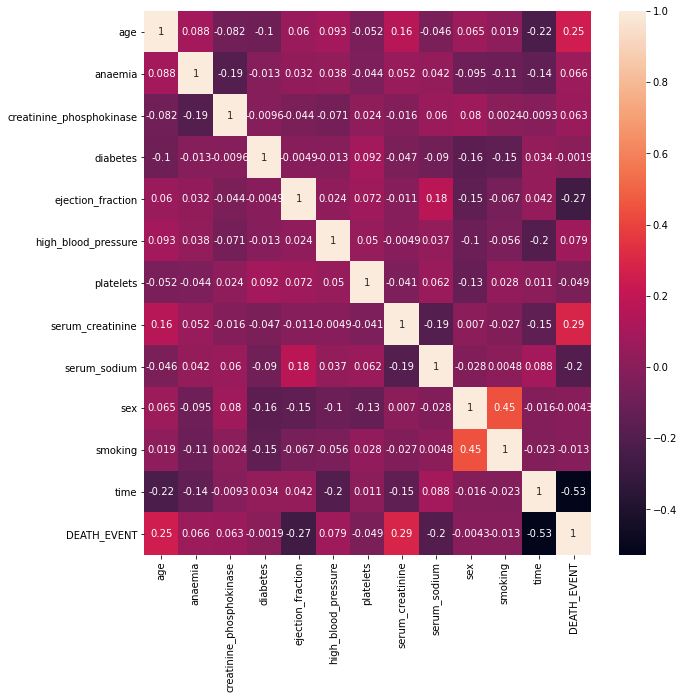

In [41]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)
plt.show()

In [42]:
discrete_features, continuous_features = [], []
for feature in df.columns:
    if feature == 'DEATH_EVENT':
        label = ['DEATH_EVENT']
    elif len(df[feature].unique()) >= 10:
        continuous_features.append(feature)
    else:
        discrete_features.append(feature)

print('Discrete: ', discrete_features, '\n', 'Continuous', continuous_features)

Discrete:  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'] 
 Continuous ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


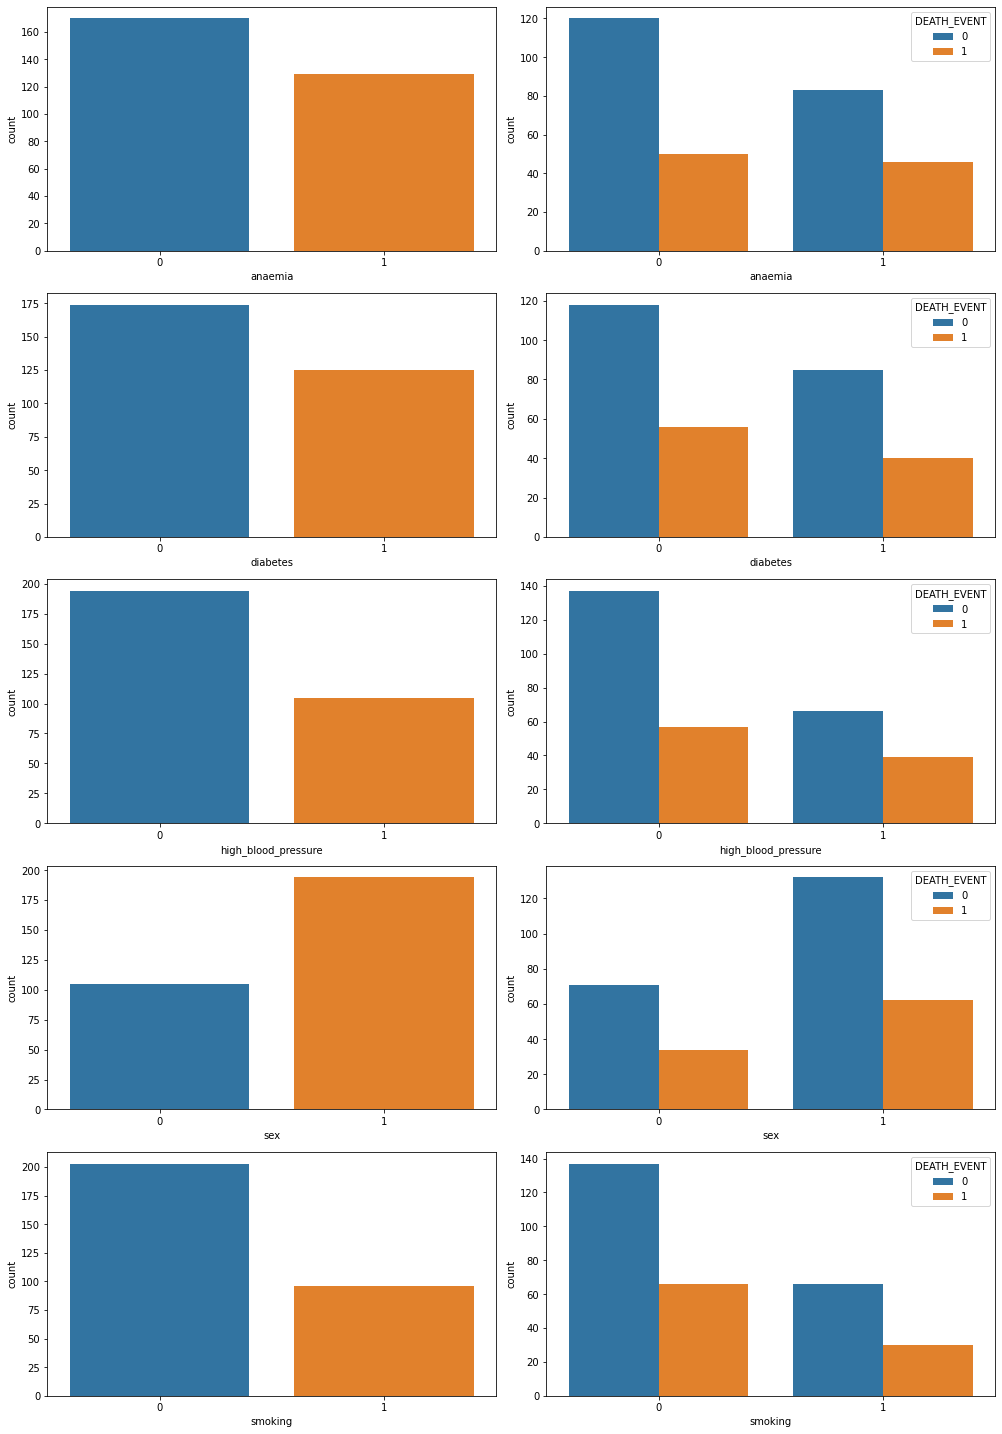

In [43]:
fig, ax = plt.subplots(len(discrete_features), 2, figsize=(14,20))

for i in range(len(discrete_features)):
    sns.countplot(ax=ax[i, 0], x=discrete_features[i], data=df)
    sns.countplot(ax=ax[i, 1], x=discrete_features[i], hue='DEATH_EVENT', data=df)
fig.tight_layout(pad=1)
plt.show()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

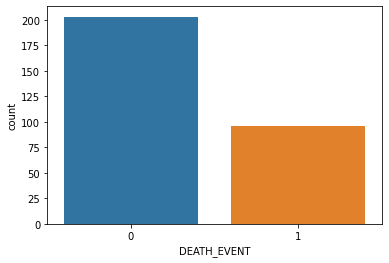

In [44]:
sns.countplot(x='DEATH_EVENT', data=df)

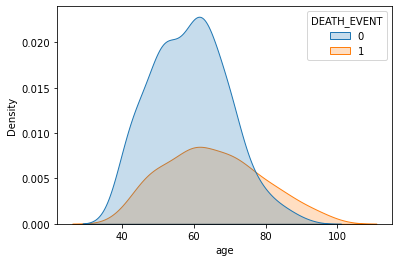

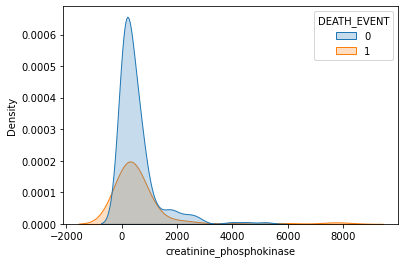

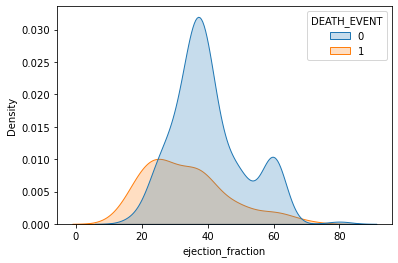

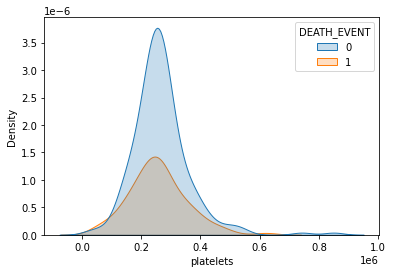

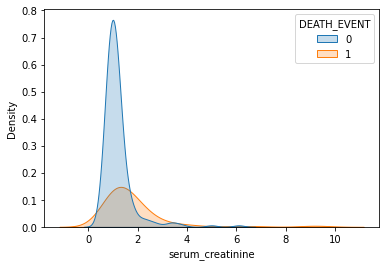

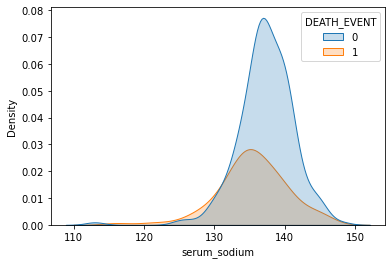

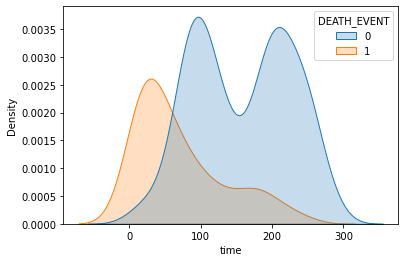

In [45]:
for feature in continuous_features:
    sns.kdeplot(x=feature,hue="DEATH_EVENT",data=df,fill=True)
    plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, SelectFromModel, SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.svm import SVC




best_features = SelectKBest(chi2, k=10)
features_ranking = best_features.fit(df.drop(['DEATH_EVENT'], axis=1), df['DEATH_EVENT'])
ranking_dictionary = {}
for i in range(len(features_ranking.scores_)):
    ranking_dictionary[df.columns[i]] = round(features_ranking.scores_[i], 3)

asc_sort = sorted(ranking_dictionary.items(), key = lambda kv:(kv[1], kv[0]))

for i, j in asc_sort:
    print(i, ':', j)

diabetes : 0.001
sex : 0.002
smoking : 0.032
anaemia : 0.747
high_blood_pressure : 1.222
serum_sodium : 1.618
serum_creatinine : 19.814
age : 44.619
ejection_fraction : 79.073
creatinine_phosphokinase : 1897.315
time : 3826.893
platelets : 26135.772


In [49]:
feature_model = SelectFromModel(Lasso(alpha=0.05, random_state=0))
feature_model.fit(df.drop(['DEATH_EVENT'], axis=1), df['DEATH_EVENT'])

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [50]:
mask = feature_model.get_support() 
for i in range(len(mask)):
    if not mask[i]:
        print(df.drop(['DEATH_EVENT'], axis=1).columns[i])

anaemia
diabetes
high_blood_pressure
platelets
sex
smoking


In [ ]:
Observations
Based on EDA and Feature Selection, features such as anaemia, diabetes, age, sex, smoking are less contributing.
Features to be considered are, platelets, time, creatinine_phosphokinase, ejection_fraction.

In [51]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(239, 12) (60, 12)


The accuracy of Logistic Regression is :  78.33333333333333 %
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        37
           1       0.92      0.48      0.63        23

    accuracy                           0.78        60
   macro avg       0.83      0.73      0.74        60
weighted avg       0.81      0.78      0.76        60



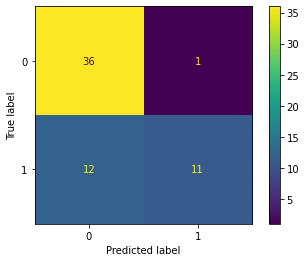

In [52]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Random Forest is :  83.33333333333334 %
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        37
           1       0.88      0.65      0.75        23

    accuracy                           0.83        60
   macro avg       0.85      0.80      0.81        60
weighted avg       0.84      0.83      0.83        60



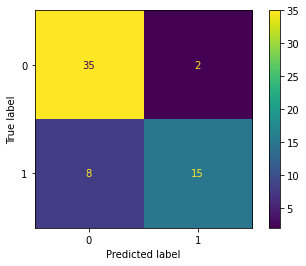

In [53]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

In [ ]:
Considering all the features, the accuracy with Logistic Regression is 78% and Random Forest is 85%

In [54]:
X = df[['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time']]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(239, 5) (60, 5)


The accuracy of Logistic Regression is :  86.66666666666667 %
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.76      0.76      0.76        17

    accuracy                           0.87        60
   macro avg       0.84      0.84      0.84        60
weighted avg       0.87      0.87      0.87        60



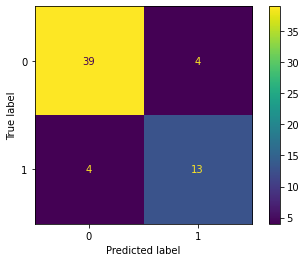

In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Random Forest is :  93.33333333333333 %
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.93      0.82      0.87        17

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60



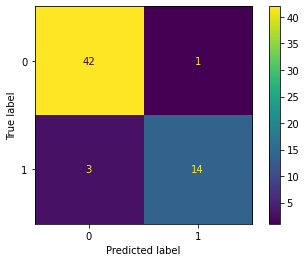

In [56]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Gradient Boost is :  93.33333333333333 %
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.93      0.82      0.87        17

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60



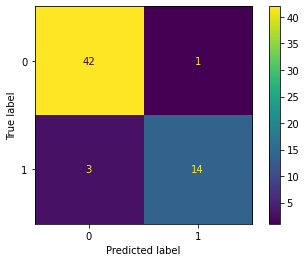

In [57]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Gradient Boost is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

In [ ]:
eliminating a few features and considering creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, time,

The accuracies are:

Logistic Regression --> 87%
Random Forest -->91%
Gradient Boosting --> 91%

In [58]:
X = df[['ejection_fraction', 'serum_creatinine', 'time']]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(239, 3) (60, 3)


The accuracy of Logistic Regression is :  90.0 %
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.87      0.76      0.81        17

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.90      0.90      0.90        60



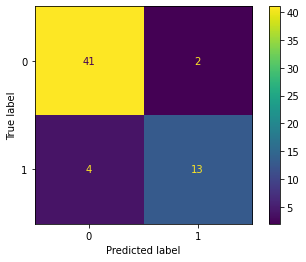

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Random Forest is :  91.66666666666666 %
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.93      0.76      0.84        17

    accuracy                           0.92        60
   macro avg       0.92      0.87      0.89        60
weighted avg       0.92      0.92      0.91        60



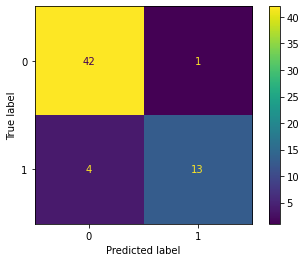

In [60]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Gradient Boost is :  95.0 %
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.94      0.88      0.91        17

    accuracy                           0.95        60
   macro avg       0.95      0.93      0.94        60
weighted avg       0.95      0.95      0.95        60



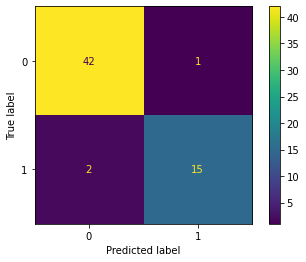

In [61]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Gradient Boost is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

In [ ]:
considing the ones which are highly correlated to the output label, features = {ejection_fraction, serum_creatinine, time}

Logistic Regression --> 90%
Random Forest --> 90%
Gradient Boosting --> 95%

In [67]:
#sampling

X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

oversample = RandomOverSampler(sampling_strategy='minority')
X_sampled, y_sampled = oversample.fit_resample(X, y)
print(Counter(y_sampled))

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Counter({1: 203, 0: 203})
(324, 12) (82, 12)


In [66]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


The accuracy of Logistic Regression is :  81.70731707317073 %
              precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.82      0.87      0.85        47

    accuracy                           0.82        82
   macro avg       0.82      0.81      0.81        82
weighted avg       0.82      0.82      0.82        82



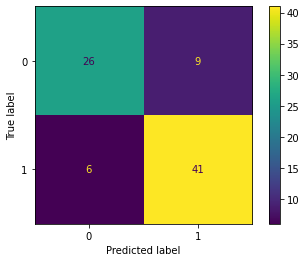

In [68]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

The accuracy of Random Forest is :  92.6829268292683 %
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        35
           1       0.94      0.94      0.94        47

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82



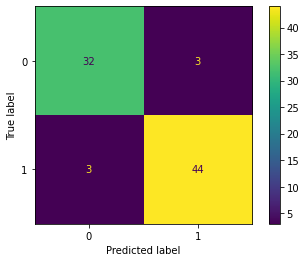

In [69]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

In [73]:
#different features
from imblearn.over_sampling import SMOTE

X = df[['ejection_fraction', 'serum_creatinine', 'time']]
y = df['DEATH_EVENT']

oversample = SMOTE(sampling_strategy='minority')
X_sampled, y_sampled = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(324, 3) (82, 3)


The accuracy of Gradient Boost is :  91.46341463414635 %
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.91      0.93      0.92        43

    accuracy                           0.91        82
   macro avg       0.92      0.91      0.91        82
weighted avg       0.91      0.91      0.91        82



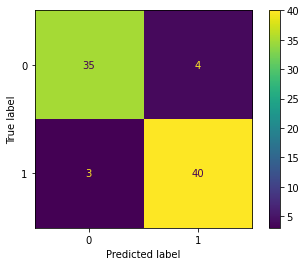

In [75]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf = plot_confusion_matrix(model, X_test, y_test)
print ("The accuracy of Gradient Boost is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))

In [ ]:
slightly corrected as it is tested on sampled data.

Logistic Regression --> 90%
Random Forest --> 90%
Gradient Boosting --> 95%

In [76]:
import xgboost